## 1.导入库

In [1]:
%matplotlib inline
%matplotlib notebook
from IPython import display   # 加上这个才能动！！！！
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import animation
from PIL import Image

## 2.自己构建一个马尔科夫模型

In [2]:
# 构建一个马尔科夫模型update
def update(f):
    global loc
    print(f)
    
    # 第一次迭代，位置就是初始位置
    if f == 0:
        loc = loc_prime
    
    next_loc = np.zeros((m,n) , dtype=np.float)
    
    # 这里有个问题：程序在这里会一直迭代而不会讲更新过后的位置传递给调用函数，无法画动态图
    for i in np.arange(m):
        for j in np.arange(n):
            # print('计算新位置：')
            next_loc[i,j] = calc_next_loc(np.array([i,j]),loc,directions)
    
    loc = next_loc / np.max(next_loc)  # 做归一化
    im. set_array(loc)    # 重新设置im的值
    
        # 保存文件
    if save_image:
            image_data = plt.cm.coolwarm(loc) * 255
            image_data,_ = np.split(image_data,(-1,),axis=2)
            image_data = image_data.astype(np.uint8).clip(0,255)
            output = '.\\pic2\\'
            if not os.path.exists(output):
                os.mkdir(output)
            a = Image.fromarray(image_data,mode='RGB')
            a.save('%s%d.png' % (output,f))
    
    # 返回新的位置
    # print('返回新位置给调用函数')
    return [im]

In [3]:
# 计算下一个位置的概率
def calc_next_loc(now,loc,directions):
    # print('计算开始：')
    near_index = np.array([(-1,-1),(-1,0),(-1,1),   # 罗列出8领域
        (0,-1),(0,1),
        (1,-1),(1,0),(1,1)])
    directions_index = np.array([7,6,5,0,4,1,2,3])
    nn = now + near_index
    ii,jj = nn[:,0],nn[:,1]
    
    ii[ii >= m] = 0
    jj[jj >= n] = 0    # 防止出边界（做循环）
    
    # print('计算结束，返回update：')
    return loc[ii,jj] @ directions[ii,jj,directions_index]  # 核心思想（计算出下一个方向的概率）

## 3.计算下一个位置，并可视化

<IPython.core.display.Javascript object>


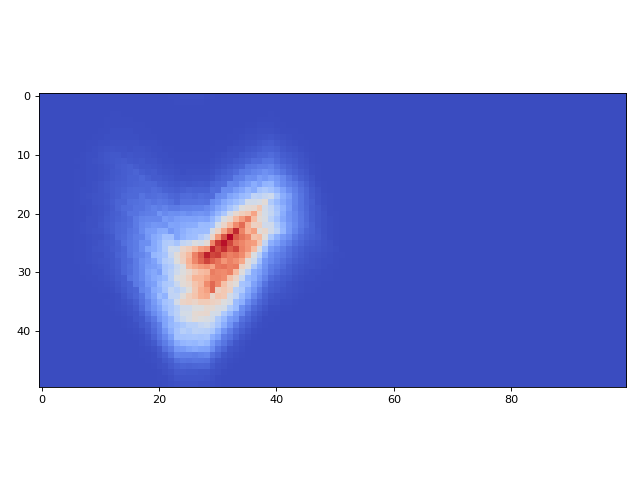

In [4]:
if __name__ == '__main__':
    
    np.set_printoptions(suppress=True,linewidth=300,edgeitems=8)
    np.random.seed(0) 
    
    save_image = True
    style = 'Random'  # Sin  Direct  Random
    m = 50
    n = 100
    directions = np.random.rand(m , n , 32)  # 默认是8领域
    
    if style == 'Direct':
        directions[:,:,1] = 10
    elif style == 'Random':
        x = np.arange(n)
        y_d = np.cos(6 * np.pi * x / n)
        theta = np.empty_like(x,dtype=np.int)
        theta[y_d > 0.5] = 1
        theta[~(y_d > 0.5) & (y_d > -0.5)] = 0
        theta[~(y_d > -0.5)] = 7
        directions[:,x.astype(np.int),theta] = 10
    
    directions[:,:] /= np.sum(directions[:,:])
    # print(directions)
        
    loc = np.zeros((m,n),dtype=np.float)
    loc[m//2,n//2] = 1           # 初始点在中间
    loc_prime = np.empty_like(loc)
    loc_prime = loc
     
    fig = plt.figure(figsize=(8,6),facecolor='w')
    im = plt.imshow(loc / np.max(loc),cmap='coolwarm')   # 初始位置
    anim = animation.FuncAnimation(fig,update,frames=300,interval=50,blit=True)
    plt.tight_layout(1.5)
    plt.show()